# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd
ames = pd.read_csv('ames.csv', index_col=0)


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [2]:
# Your code here
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [3]:
# Your code here - drop columns with missing data
ames.isna().sum().sort_values(ascending=False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

In [4]:
ames = ames.dropna(axis='columns')
ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

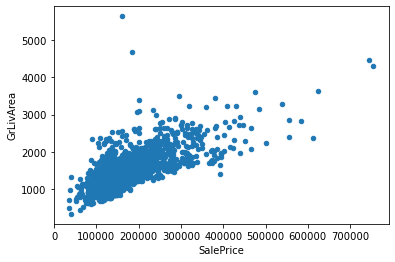

In [5]:
# Your code here - continuous numeric predictor
import matplotlib.pyplot as plt
ames.plot.scatter(y='GrLivArea', x = 'SalePrice');


### Discrete Numeric Predictor

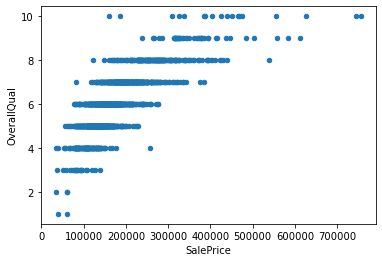

In [6]:
# Your code here - discrete numeric predictor

ames.plot.scatter(y='OverallQual', x = 'SalePrice');


### String Categorical Predictor

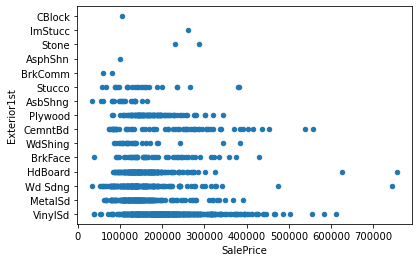

In [7]:
# Your code here - string categorical predictor

ames.plot.scatter(y='Exterior1st', x = 'SalePrice');


### Discrete Categorical Predictor

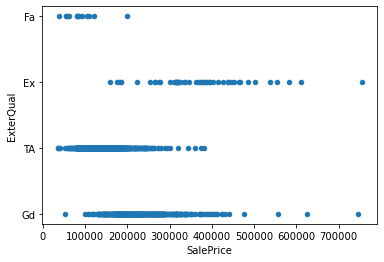

In [8]:
# Your code here - discrete categorical predictor

ames.plot.scatter(y='ExterQual', x = 'SalePrice');


## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [9]:
# Your code here - prepare X and y, including one-hot encoding
y = ames['SalePrice']
X = ames[['GrLivArea', 'OverallQual', 'ExterQual']]
X = pd.get_dummies(X, columns=['ExterQual'], drop_first=True,dtype=int)
X


,GrLivArea,OverallQual,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
Id,,,,,
1,1710,7,0,1,0
2,1262,6,0,0,1
3,1786,7,0,1,0
4,1717,7,0,0,1
5,2198,8,0,1,0
...,...,...,...,...,...
1456,1647,6,0,0,1
1457,2073,6,0,0,1
1458,2340,7,0,0,0


# Your answer here - which category or categories were dropped?
Dropped Exc in ExterQual


In [10]:
# Your code here - build a regression model and display results
import statsmodels.api as sm
X = sm.add_constant(X)
model =sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     853.0
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:32:44   Log-Likelihood:                -17544.
No. Observations:                1460   AIC:                         3.510e+04
Df Residuals:                    1454   BIC:                         3.513e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.283e+04   1.13e+04      2.907      0.004    1.07e+04     5.5e+04
GrLivArea       54.4260      2.490     21.861      0.000      49.542      59.310
OverallQual   2.384e+04   1235.922     19.286      0.000    2.14e+04    2.63e+04
ExterQual_Fa -9.943e+04   1.33e+04     -7.463      0.000   -1.26e+05   -7.33e+04
ExterQual_Gd -6.674e+04   6157.421    -10.838      0.000   -7.88e+04   -5.47e+04
ExterQual_TA -9.106e+04   6893.276    -13.210      0.000   -1.05e+05   -7.75e+04
==============================================================================
Omnibus:                      349.041   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17864.211
Skew:                          -0.042   Prob(JB):                         0.00
Kurtosis:                      20.136   Cond. No.                     2.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

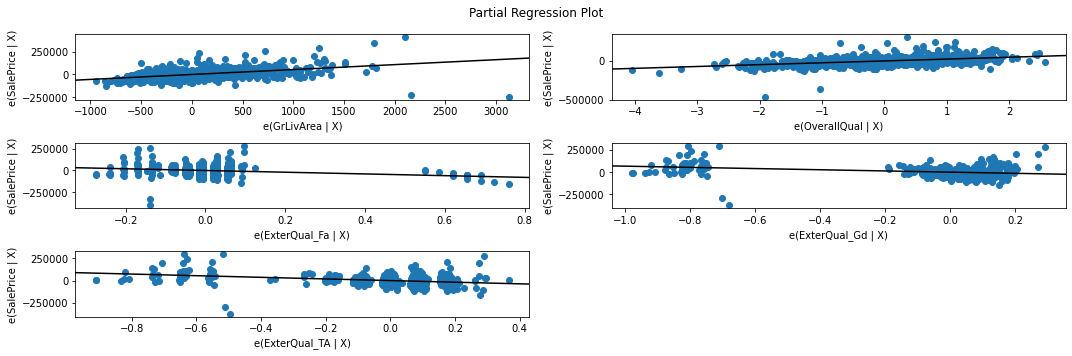

In [11]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(model,
                                  exog_idx=['GrLivArea',
                                            'OverallQual',
                                            'ExterQual_Fa',
                                            'ExterQual_Gd',
                                            'ExterQual_TA'],
                                            fig=fig
                                  )
plt.tight_layout();


## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [12]:
# Your code here - calculate an error-based metric
rmse = ((model.resid ** 2).sum() / len(y)) ** 0.5
rmse


40042.41555524683

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

# Your answer here
- F-statistic p-value shows that our model is statistically significant
- Adjusted R-squared value explains 75% of the variance
- All the independent variables are statistically significant due to P-value is less than 0.05
- The formula is:  
$$ \hat SalePrice = 32830 + 54.4260 GrLivArea + 23840 OverallQual -99430 ExterQual_Fa - 66740ExterQual_Gd - 91060ExterQual_TA $$
 
- if all the independant variables are equal to zero, the Saleprice would be 32830
- for each increase of 1 square feet in GrLivArea, the SalePrice is going to increase by 54 dollars
- every next level of OverallQual is increasing SalePrice by 23840 dollars
- We dropped first variable of ExterQual that affected the interpretation of the other regression coefficients.  
The coefficients represent the change relative to the dropped variable.

- For this specific RMSE value, it means that our model is off by about 40042 dollars in a given prediction.  






## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [13]:
# Your code here


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.